<a href="https://colab.research.google.com/github/palakagl/CapstoneProject/blob/main/Insurance_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
import io

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.pipeline import Pipeline

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score,roc_auc_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [ ]:
train_df = pd.read_csv('life_insurance_train.csv')
train_df = train_df.drop('Id',axis=1)
print('\nNumber of rows and columns in the data set: ',train_df.shape)
print('')

#Lets look into top few rows and columns in the dataset
train_df.head()


Number of rows and columns in the data set:  (41566, 127)



,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
1,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
2,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
3,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8
4,1,D2,26,0.230769,3,1,1,0.507463,0.836364,0.299163,...,0,0,0,0,0,0,0,0,0,8


In [ ]:
test_df = pd.read_csv('life_insurance_test.csv')
test_df = test_df.drop('Id',axis=1)
print('\nNumber of rows and columns in the data set: ',test_df.shape)
print('')

#Lets look into top few rows and columns in the dataset
test_df.head()


Number of rows and columns in the data set:  (17815, 126)



,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,0
1,1,D3,26,0.128205,2,3,1,0.537313,0.690909,0.309623,...,0,0,0,0,0,1,0,0,1,1
2,1,A2,26,0.102564,2,3,1,0.567164,0.618182,0.163180,...,0,0,0,0,0,0,0,0,0,0
3,1,D4,26,0.230769,2,3,1,0.179104,0.800000,0.539749,...,0,0,0,0,0,0,0,0,0,0
4,1,A2,26,0.179487,2,3,1,0.164179,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_test = pd.read_csv('response_test.csv')
y_test = y_test.drop('Id',axis=1)
print('\nNumber of rows and columns in the data set: ',y_test.shape)
print('')

#Lets look into top few rows and columns in the dataset
y_test.head()


Number of rows and columns in the data set:  (17815, 1)



,Response
0,4
1,6
2,7
3,2
4,8


In [ ]:
dtypes=pd.DataFrame(train_df.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=train_df.nunique()
dtypes["Null Values"]=train_df.isnull().sum()
dtypes["% null Values"]=train_df.isnull().sum()/len(train_df)
dtypes.style.background_gradient(cmap='Set2',axis=0)

,Data Type,Unique Values,Null Values,% null Values
Product_Info_1,int64,2,0,0.000000
Product_Info_2,object,19,0,0.000000
Product_Info_3,int64,31,0,0.000000
Product_Info_4,float64,1052,0,0.000000
Product_Info_5,int64,2,0,0.000000
Product_Info_6,int64,2,0,0.000000
Product_Info_7,int64,3,0,0.000000
Ins_Age,float64,65,0,0.000000
Ht,float64,38,0,0.000000
Wt,float64,293,0,0.000000


In [ ]:
dtypes=pd.DataFrame(test_df.dtypes,columns=["Data Type"])
dtypes["Unique Values"] = test_df.nunique()
dtypes["Null Values"] = test_df.isnull().sum()
dtypes["% null Values"] = test_df.isnull().sum()/len(test_df)
dtypes.style.background_gradient(cmap='Set2',axis=0)

,Data Type,Unique Values,Null Values,% null Values
Product_Info_1,int64,2,0,0.000000
Product_Info_2,object,19,0,0.000000
Product_Info_3,int64,21,0,0.000000
Product_Info_4,float64,558,0,0.000000
Product_Info_5,int64,2,0,0.000000
Product_Info_6,int64,2,0,0.000000
Product_Info_7,int64,2,0,0.000000
Ins_Age,float64,62,0,0.000000
Ht,float64,32,0,0.000000
Wt,float64,258,0,0.000000


In [ ]:
list_train = train_df.columns[train_df.isna().any()].tolist()

In [ ]:
list_test =  test_df.columns[test_df.isna().any()].tolist()

In [ ]:
for column in list_train:
    train_df[column].fillna(train_df[column].mean(), inplace=True)

In [ ]:
for column in list_test:
    test_df[column].fillna(test_df[column].mean(), inplace=True)

In [ ]:
# label encode the Product_Info_2 variable
train_df['Product_Info_2'] = LabelEncoder().fit_transform(train_df['Product_Info_2'])
test_df['Product_Info_2'] = LabelEncoder().fit_transform(test_df['Product_Info_2'])

In [ ]:
dtypes=pd.DataFrame(train_df.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=train_df.nunique()
dtypes["Null Values"]=train_df.isnull().sum()
dtypes["% null Values"]=train_df.isnull().sum()/len(train_df)
dtypes.style.background_gradient(cmap='Set2',axis=0)

,Data Type,Unique Values,Null Values,% null Values
Product_Info_1,int64,2,0,0.000000
Product_Info_2,int64,19,0,0.000000
Product_Info_3,int64,31,0,0.000000
Product_Info_4,float64,1052,0,0.000000
Product_Info_5,int64,2,0,0.000000
Product_Info_6,int64,2,0,0.000000
Product_Info_7,int64,3,0,0.000000
Ins_Age,float64,65,0,0.000000
Ht,float64,38,0,0.000000
Wt,float64,293,0,0.000000


In [ ]:
dtypes=pd.DataFrame(test_df.dtypes,columns=["Data Type"])
dtypes["Unique Values"] = test_df.nunique()
dtypes["Null Values"] = test_df.isnull().sum()
dtypes["% null Values"] = test_df.isnull().sum()/len(test_df)
dtypes.style.background_gradient(cmap='Set2',axis=0)

,Data Type,Unique Values,Null Values,% null Values
Product_Info_1,int64,2,0,0.000000
Product_Info_2,int64,19,0,0.000000
Product_Info_3,int64,21,0,0.000000
Product_Info_4,float64,558,0,0.000000
Product_Info_5,int64,2,0,0.000000
Product_Info_6,int64,2,0,0.000000
Product_Info_7,int64,2,0,0.000000
Ins_Age,float64,62,0,0.000000
Ht,float64,32,0,0.000000
Wt,float64,258,0,0.000000


In [ ]:
X_test = test_df

Text(0.5, 1.0, 'Response')

Text(0, 0.5, '')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Response')

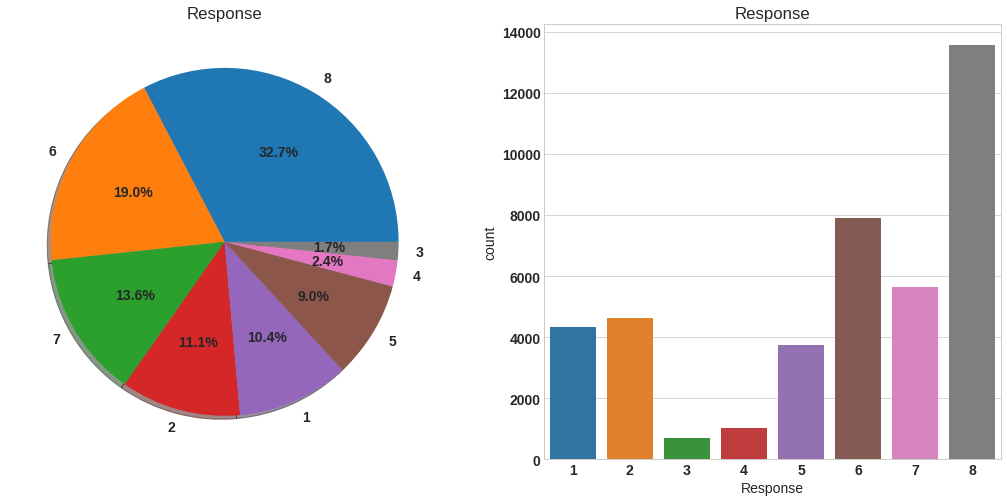

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Response'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Response')
ax[0].set_ylabel('')
sns.countplot('Response',data=train_df,ax=ax[1])
ax[1].set_title('Response')
plt.show()

In [ ]:
X_train = train_df.drop('Response',axis=1) # Independet variable
y_train = train_df['Response'] # Dependent variable

In [ ]:
# oversample the dataset to fix class imbalance
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
X_train.shape
y_train.shape

(108592, 126)

(108592,)

Class=8, n=13574 (12.500%)
Class=1, n=13574 (12.500%)
Class=2, n=13574 (12.500%)
Class=3, n=13574 (12.500%)
Class=5, n=13574 (12.500%)
Class=7, n=13574 (12.500%)
Class=6, n=13574 (12.500%)
Class=4, n=13574 (12.500%)


<BarContainer object of 8 artists>

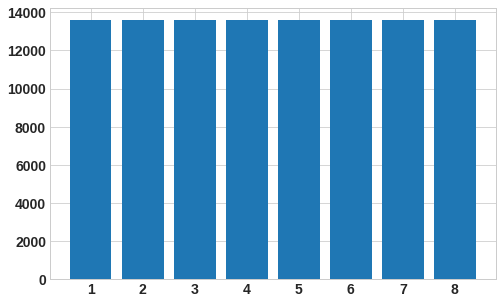

In [ ]:
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=110, min_samples_split=10, random_state=11)

pipe1 = Pipeline(steps=[
                        ("clf", clf1)
                        ])

scores = cross_val_score(pipe1, X_train, y_train, cv=15, scoring="accuracy")


with np.printoptions(formatter={'float': '{: 0.3f}'.format}):
  print("CV scores: {}".format(scores))
print("Estimated F1 Score: {:0.3f} +/- {:0.2f}".format(np.mean(scores), np.std(scores)))

In [ ]:
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=80, min_samples_split=10, random_state=11)

pipe2 = Pipeline(steps=[
                        ('scaler', StandardScaler()),
                        ("clf", clf2)
                        ])

scores = cross_val_score(pipe2, X_train, y_train, cv=20, scoring="accuracy")


with np.printoptions(formatter={'float': '{: 0.3f}'.format}):
  print("CV scores: {}".format(scores))
print("Estimated F1 Score: {:0.3f} +/- {:0.2f}".format(np.mean(scores), np.std(scores)))

In [ ]:
clf3 = RandomForestClassifier(random_state=11)

pipe3 = Pipeline(steps=[
                        ('scaler', StandardScaler()),
                        ("clf", clf3)
                        ])

scores = cross_val_score(pipe3, X_train, y_train, cv=10, scoring="accuracy")

with np.printoptions(formatter={'float': '{: 0.3f}'.format}):
  print("CV scores: {}".format(scores))
print("Estimated F1 Score: {:0.3f} +/- {:0.2f}".format(np.mean(scores), np.std(scores)))

In [ ]:
# Fit/predict
clf4 = ExtraTreesClassifier()
clf4 = clf4.fit(X_train, y_train)
y_pred = clf4.predict(X_test)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(18, 15))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=["class_1", "class_2", "class_3", "class_4", "class_5", "class_6", "class_7", "class_8",],
)

cmp.plot(ax=ax)
plt.show();

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
'''
# Don't have to set `multi_class` argument if used with OVOClassifier
clf5 = OneVsOneClassifier(estimator=GaussianProcessClassifier())
clf5 = clf5.fit(X_train, y_train)

# Print the number of estimators created
print(len(clf5.estimators_))

# Failed even with GPU and High RAM
'''

In [ ]:
# Fit/predict
clf4 = GradientBoostingClassifier(n_estimators=100, max_depth = 10000, learning_rate = 0.01)
clf4 = clf4.fit(X_train, y_train)
y_pred = clf4.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# Fit/predict
clf6 = RandomForestClassifier(max_depth= 800, min_samples_leaf=50, min_samples_split= 50, n_estimators= 80)
clf6 = clf6.fit(X_train, y_train)
y_pred = clf6.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# Fit/predict
clf7 = XGBClassifier(learning_rate= 0.05, max_depth= 500, n_estimators= 100)
clf7 = clf7.fit(X_train, y_train)
y_pred = clf7.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# Fit/predict
clf8 = SVC(kernel='linear')
clf8 = clf8.fit(X_train, y_train)
y_pred = clf8.predict(X_test)
print(classification_report(y_test, y_pred))